In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme


import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [ ]:
jt.get_themes()

In [ ]:
import pandas as pd

![metadata](../img/metadata.png "Field information")

In [104]:
set_nb_theme('oceans16')

In [5]:
# In this dataset, -99.99 signifies missing value
# The index would be created on the Date column
mlo = pd.read_csv('../datasets/co2-mm-mlo.csv',na_values=-99.99,index_col='Date',parse_dates=True)
mlo.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,NaN,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


In [9]:
type(mlo)

pandas.core.frame.DataFrame

In [10]:
mlo.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='Date', length=727, freq=None)

In [14]:
mlo.loc['1958-03-01']

Decimal Date      1958.208
Average            315.710
Interpolated       315.710
Trend              314.620
Number of Days      -1.000
Name: 1958-03-01 00:00:00, dtype: float64

In [15]:
# To access the column wise data for a specific date
mlo.loc['1958-03-01','Decimal Date']

1958.208

<Axes: xlabel='Date'>

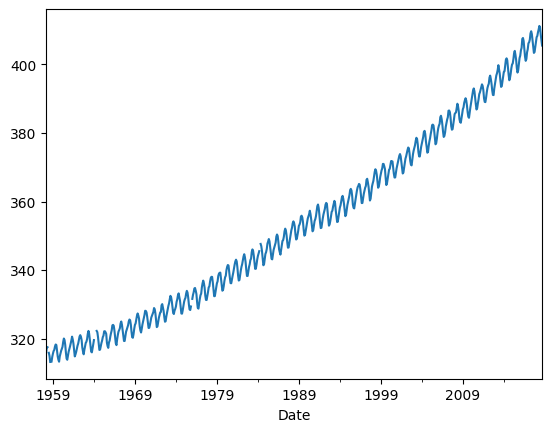

In [16]:
# Make a plot of the Average column 
mlo['Average'].plot()

In [17]:
pd.date_range('2017-09-01', periods=5, freq='D')

DatetimeIndex(['2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05'],
              dtype='datetime64[ns]', freq='D')

In [24]:
n_hours = 24
hour_index = pd.date_range(start='2017-09-01',periods=n_hours, freq='H')
hour_index

DatetimeIndex(['2017-09-01 00:00:00', '2017-09-01 01:00:00',
               '2017-09-01 02:00:00', '2017-09-01 03:00:00',
               '2017-09-01 04:00:00', '2017-09-01 05:00:00',
               '2017-09-01 06:00:00', '2017-09-01 07:00:00',
               '2017-09-01 08:00:00', '2017-09-01 09:00:00',
               '2017-09-01 10:00:00', '2017-09-01 11:00:00',
               '2017-09-01 12:00:00', '2017-09-01 13:00:00',
               '2017-09-01 14:00:00', '2017-09-01 15:00:00',
               '2017-09-01 16:00:00', '2017-09-01 17:00:00',
               '2017-09-01 18:00:00', '2017-09-01 19:00:00',
               '2017-09-01 20:00:00', '2017-09-01 21:00:00',
               '2017-09-01 22:00:00', '2017-09-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
import numpy as np

<Axes: >

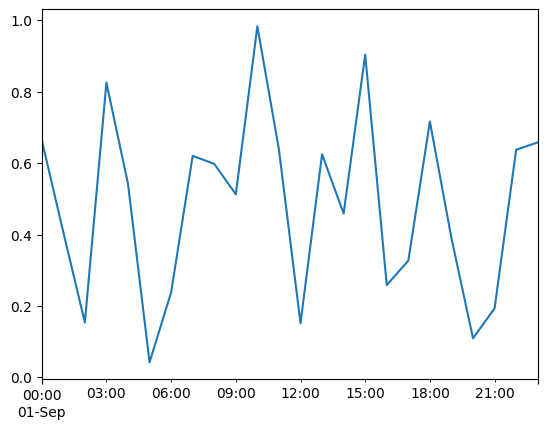

In [27]:
# Plot a random plot based on the hourly index
pd.Series(np.random.rand(n_hours),index = hour_index).plot()

In [33]:
# rolling window function
df = pd.DataFrame({'B': [3, 1, 2, np.nan, 4]})
df.rolling(3).sum()

,B
0,NaN
1,NaN
2,6.0
3,NaN
4,NaN


In [34]:
# Rolling Window Operations
mlo['Interpolated'].notnull().value_counts()

True    727
Name: Interpolated, dtype: int64

<Axes: xlabel='Date'>

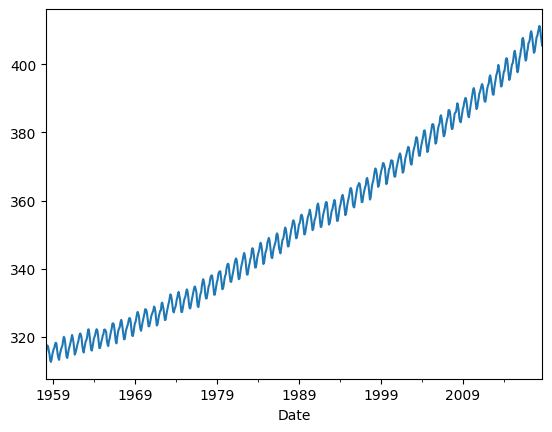

In [94]:
s = mlo['Interpolated']
s.plot()

<Axes: xlabel='Date'>

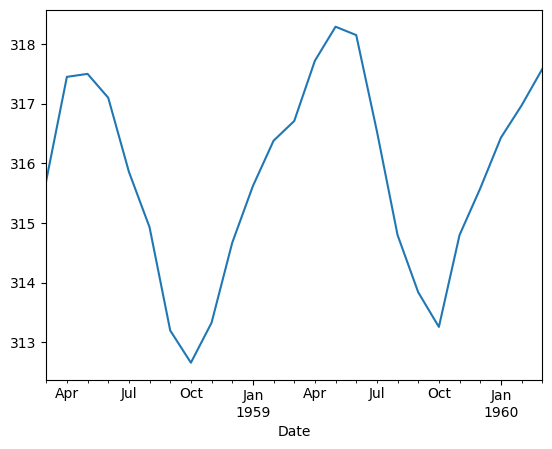

In [81]:
# Select the first two years of the Time Series
s[:'1960-03-01'].plot()

In [82]:
# By using rolling window, we would be able to smooth our data
s[:'1960-01'].rolling(12).mean()

Date
1958-03-01           NaN
1958-04-01           NaN
1958-05-01           NaN
1958-06-01           NaN
1958-07-01           NaN
1958-08-01           NaN
1958-09-01           NaN
1958-10-01           NaN
1958-11-01           NaN
1958-12-01           NaN
1959-01-01           NaN
1959-02-01    315.367500
1959-03-01    315.450833
1959-04-01    315.473333
1959-05-01    315.539167
1959-06-01    315.626667
1959-07-01    315.683333
1959-08-01    315.672500
1959-09-01    315.725833
1959-10-01    315.775833
1959-11-01    315.898333
1959-12-01    315.974167
1960-01-01    316.041667
Name: Interpolated, dtype: float64

<Axes: xlabel='Date'>

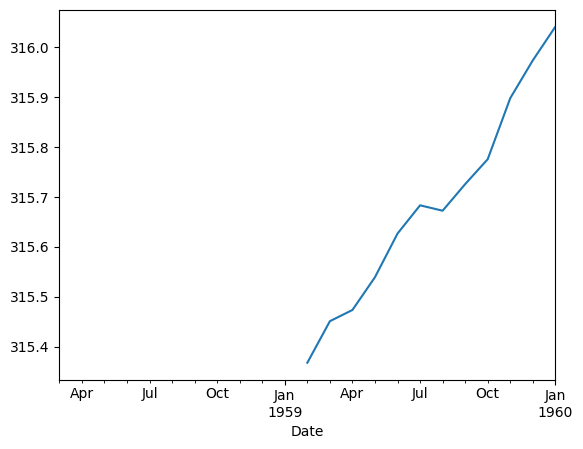

In [68]:
s[:'1960-01'].rolling(12).mean().plot()

<Axes: xlabel='Date'>

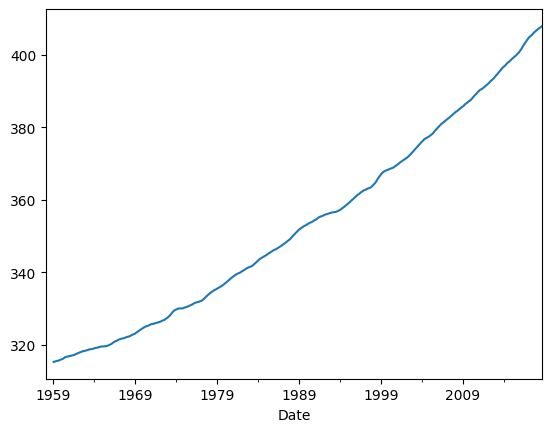

In [83]:
s.rolling(12).mean().plot()

In [84]:
# Create a data frame which stores mlo plus the rolling average in a new column
df = mlo.assign(smooth=s.rolling(12).mean())
df.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days,smooth
Date,,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1,NaN
1958-04-01,1958.292,317.45,317.45,315.29,-1,NaN
1958-05-01,1958.375,317.50,317.50,314.71,-1,NaN
1958-06-01,1958.458,NaN,317.10,314.85,-1,NaN
1958-07-01,1958.542,315.86,315.86,314.98,-1,NaN


<Axes: xlabel='Date'>

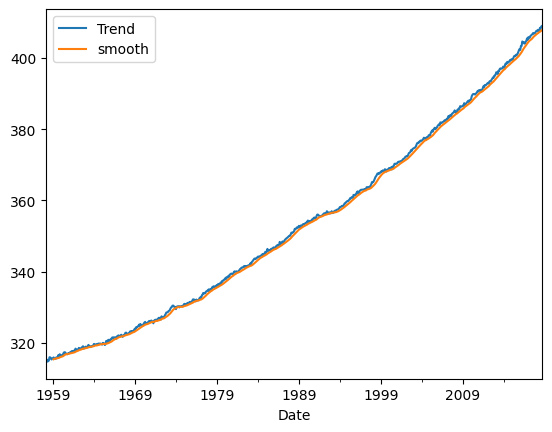

In [85]:
df[['Trend','smooth']].plot()

In [93]:
# PeriodIndex
# Using .rolling() with a time-based index is similar to resampling; .rolling() is a time-based window operation,
# while .resample() is a frequency-based window operation.
# would be obtained by the partial indexing

s[:'1960-03']

s.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01', '1959-01-01', '1959-02-01',
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [87]:
s['1958-03':'1958-06']

Date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
Name: Interpolated, dtype: float64

In [88]:
pd.Timestamp('1958-03-01')

Timestamp('1958-03-01 00:00:00')

In [89]:
pd.Period('1958-03-01', freq='M')

Period('1958-03', 'M')

In [96]:
monthly_index = pd.period_range('1958-03-01', periods=727, freq='M')
monthly_index

PeriodIndex(['1958-03', '1958-04', '1958-05', '1958-06', '1958-07', '1958-08',
             '1958-09', '1958-10', '1958-11', '1958-12',
             ...
             '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
             '2018-06', '2018-07', '2018-08', '2018-09'],
            dtype='period[M]', length=727)

In [98]:
s.index = monthly_index
s.index

PeriodIndex(['1958-03', '1958-04', '1958-05', '1958-06', '1958-07', '1958-08',
             '1958-09', '1958-10', '1958-11', '1958-12',
             ...
             '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
             '2018-06', '2018-07', '2018-08', '2018-09'],
            dtype='period[M]', length=727)

In [99]:
s['1958']

1958-03    315.71
1958-04    317.45
1958-05    317.50
1958-06    317.10
1958-07    315.86
1958-08    314.93
1958-09    313.20
1958-10    312.66
1958-11    313.33
1958-12    314.67
Freq: M, Name: Interpolated, dtype: float64

In [100]:
s.head(15)

1958-03    315.71
1958-04    317.45
1958-05    317.50
1958-06    317.10
1958-07    315.86
1958-08    314.93
1958-09    313.20
1958-10    312.66
1958-11    313.33
1958-12    314.67
1959-01    315.62
1959-02    316.38
1959-03    316.71
1959-04    317.72
1959-05    318.29
Freq: M, Name: Interpolated, dtype: float64

In [102]:
# Resample the data
# Down sample the timeseries over the interval of the three months
s.index = s.index.astype('datetime64[ns]')
re = s.resample('3M').min()
re.head()

1958-03-31    315.71
1958-06-30    317.10
1958-09-30    313.20
1958-12-31    312.66
1959-03-31    315.62
Freq: 3M, Name: Interpolated, dtype: float64

In [103]:
# If we wanted to compute the difference between re values and mlo['Trend'] values, we would have to begin with up-sampling re.
up = re.resample('M').asfreq()
up.head(10)

1958-03-31    315.71
1958-04-30       NaN
1958-05-31       NaN
1958-06-30    317.10
1958-07-31       NaN
1958-08-31       NaN
1958-09-30    313.20
1958-10-31       NaN
1958-11-30       NaN
1958-12-31    312.66
Freq: M, Name: Interpolated, dtype: float64